In [17]:
import sys

sys.path.append("/home/danielnicolau/Documents/GitHub/OML_GroupB/Python/classification")
sys.path.append("/home/danielnicolau/Documents/GitHub/OML_GroupB/")
import utils
import preprocessing
import evaluation
import pandas as pd
import numpy as np

In [19]:
data_pd = pd.read_excel("/home/danielnicolau/Documents/GitHub/OML_GroupB/data/Datasets_Group_B.xlsx", "Classification")
data_pd.dropna(inplace=True)
total_size = len(data_pd)
train_size = int(total_size * 0.64)
val_size = int(total_size * 0.16)
train_data = data_pd.iloc[:train_size]
val_data = data_pd.iloc[train_size : train_size + val_size]
test_data = data_pd.iloc[train_size + val_size :]

In [20]:
train_data, train_label = utils.get_numpy_features(train_data)
val_data, val_label = utils.get_numpy_features(val_data)
test_data, test_label = utils.get_numpy_features(test_data)

In [22]:
temperature_data = train_data[:,5]
temperature_data

array([19.56666667, 19.66      , 19.67      , ..., 21.11      ,
       21.08666667, 21.08      ])

In [25]:
from scipy.fft import fft, fftfreq
fourier_transform = fft(temperature_data)
fourier_transform

array([1833200.37833333    -0.j        ,  -35365.42333548+21926.70078765j,
          2631.57505416 +6989.64174912j, ...,
         11747.38754191 +9554.63990969j,    2631.57505416 -6989.64174912j,
        -35365.42333548-21926.70078765j])

In [27]:
sampling_rate = 1

In [28]:
frequencies = fftfreq(len(temperature_data), d=1/sampling_rate)

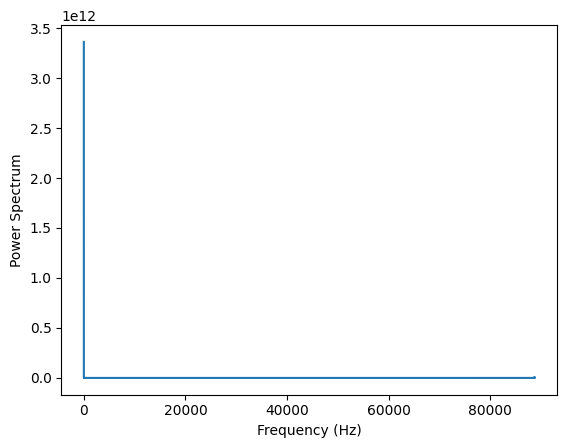

In [35]:
import matplotlib.pyplot as plt
plt.plot(frequencies, np.abs(fourier_transform)**2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectrum')
plt.show()

In [39]:
x = sorted(np.abs(fourier_transform)**2)


In [42]:
max(x)


3360623627121.476